In [357]:
from __future__ import division

In [380]:
import numpy as np

def influence(r,R):
    return (float)((1/R**2)*np.exp(-(np.pi*r**2)/(R**2)))

def issafe(i,j,k,l,m,n,gs,R):
    r = (float)(((i-k)*gs)**2+((j-l)*gs)**2)**0.5
    if k<m and k>=0 and l<n and l>=0 and r<=R:
        return True
    else:
        return False

In [381]:
delta = 15
D = 300
W = 100
L = 500
gs=10
R = D*np.tan(np.pi*delta/180)

In [382]:
grid = [[0 for r in range(0,(int)((W+2*R)/gs))] for j in range(0,(int)((L+2*R)/gs))]
sratio = [[0. for r in range(0,(int)((W+2*R)/gs))] for j in range(0,(int)((L+2*R)/gs))]

In [383]:
for i in range((int)(R/gs),(int)((L+1+R)/gs)):
    for j in range((int)(R/gs),(int)((W+1+R)/gs)):
        grid[i][j] = 1

In [384]:
import numpy as np
np.set_printoptions(edgeitems=127)
grid = np.asarray(grid)
grid.shape

(66, 26)

In [403]:
# for i in range(grid.size()
for i in range(0,grid.shape[0]):
    for j in range(0,grid.shape[1]):
        sratio[i][j] = 0.
        for k in range((int)(i-(R/gs)),(int)(i+1+(R/gs))):
            for l in range((int)(j-(R/gs)),(int)(j+1+(R/gs))):
                if issafe(i,j,k,l,grid.shape[0],grid.shape[1],gs,R):
                    sratio[i][j] = sratio[i][j] + (float)(grid[k][l]*influence(((((i-k)*gs)**2)+(((j-l)*gs)**2))**0.5,R))
# np.set_printoptions(threshold=np.nan)

In [423]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

In [424]:
Z = sratio

In [425]:
Z = np.asarray(Z)

In [426]:
nr,nc = Z.shape[0],Z.shape[1]

In [427]:
z= np.asmatrix(Z)

In [428]:
Xi = []
Yi = []
Zi = []
for x in range(0,Z.shape[0]):
    Xi.append(x)
for y in range(0,Z.shape[1]):
    Yi.append(y)
for x in range(0,Z.shape[0]):
    zs = []
    for y in range(0,Z.shape[1]):
        zs.append(Z[x][y])        
    Zi.append(zs) 

In [429]:
Xi = np.asarray(Xi,dtype='int')
Yi = np.asarray(Yi,dtype='int')
x,y = np.meshgrid(Xi,Yi)
x.shape

(26, 66)

In [430]:
Za = np.asarray(Zi)
Zar = Za.reshape(x.shape)
Zar.shape

(26, 66)

In [431]:
zc = np.array([(float)(Z[xx][yy]) for xx,yy in zip(np.ravel(x),np.ravel(y))])

In [433]:
zcr = zc.reshape(x.shape)

In [434]:
zcr.shape

(26, 66)

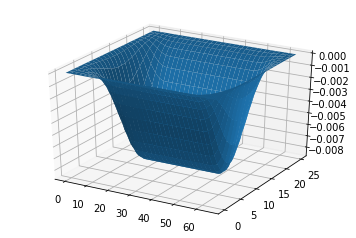

In [435]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure()
ax = fig.gca(projection='3d')
# surf = ax.plot_surface(x, y, zcr, rstride=1, cstride=1, cmap=cm.coolwarm,
#         linewidth=0, antialiased=False)
# ax.view_init(azim=0, elev=100)
# ax = fig.add_subplot(111, projection='3d')
# ax.set_zlim(-1.01, 1.01)
ax.plot_surface(x, y, -zcr)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# fig.colorbar(surf, shrink=0.5, aspect=20)

plt.show()

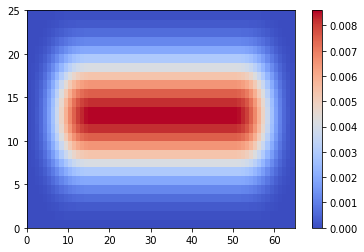

In [436]:
z = zcr
# z_min, z_max = -np.abs(z).max(), np.abs(z).max()



plt.subplot()
plt.pcolor(x, y, z, cmap=cm.coolwarm,
        linewidth=10, antialiased=False)

plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.show()

In [ ]:
f=open("f.txt","r")
a=[]
x = f.readlines()
for l in x:
    a.append(l.split())